In [ ]:
!gdown "1pv6YiFFuQ8VtJIvZyZKTtwqbF74GxniI"

Downloading...
From: https://drive.google.com/uc?id=1pv6YiFFuQ8VtJIvZyZKTtwqbF74GxniI
To: /content/sample_data_for_user_663960.csv
100% 12.1M/12.1M [00:00<00:00, 115MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from datetime import datetime , timedelta
import pytz
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('sample_data_for_user_663960.csv')

In [ ]:
dataset.head(5)

,Unnamed: 0.1,Unnamed: 0,_id,sStat,motion,rcvdTm,ep,utc,Time,dateTag,...,sMID,sNm,sTyp,sTech,uqID,sloc,gwTz,isAppl,isExitD,__v
0,0,0,{'$oid': '612ebdbbc6841343c0f024f8'},"['0', '0', '0', '0', '1', '1', '0', '0', '0', ...",Motion,{'$date': '2021-08-31T23:39:33Z'},5.0,683768373,01-Sep-2021 00:39:33,20210901,...,F500D0FEFF2C6A3C,Sensor-D000F5,Motion Sensor,zigbee,663960,Bedroom,Europe/London,False,False,0
1,1,1,{'$oid': '612ebd25c6841343c0f02319'},"['0', '0', '0', '0', '1', '1', '0', '0', '0', ...",Motion,{'$date': '2021-08-31T23:37:07Z'},5.0,683768227,01-Sep-2021 00:37:07,20210901,...,F500D0FEFF2C6A3C,Sensor-D000F5,Motion Sensor,zigbee,663960,Bedroom,Europe/London,False,False,0
2,2,2,{'$oid': '612ea965c6841343c0efe15f'},"['0', '0', '0', '0', '1', '1', '0', '0', '0', ...",Motion,{'$date': '2021-08-31T22:12:25Z'},5.0,683763145,31-Aug-2021 23:12:25,20210831,...,F500D0FEFF2C6A3C,Sensor-D000F5,Motion Sensor,zigbee,663960,Bedroom,Europe/London,False,False,0
3,3,3,{'$oid': '612ea928c6841343c0efe0a3'},"['0', '0', '0', '0', '1', '1', '0', '0', '0', ...",Motion,{'$date': '2021-08-31T22:11:32Z'},5.0,683763092,31-Aug-2021 23:11:32,20210831,...,F500D0FEFF2C6A3C,Sensor-D000F5,Motion Sensor,zigbee,663960,Bedroom,Europe/London,False,False,0
4,4,4,{'$oid': '612ea8cdc6841343c0efdf7e'},"['0', '0', '0', '0', '1', '1', '0', '0', '0', ...",Motion,{'$date': '2021-08-31T22:10:14Z'},5.0,683763014,31-Aug-2021 23:10:14,20210831,...,F500D0FEFF2C6A3C,Sensor-D000F5,Motion Sensor,zigbee,663960,Bedroom,Europe/London,False,False,0


# As mentioned above, required datafields for EDA are sTyp, sloc, gwTz, rcvdTm, motion, isAppl

In [ ]:
dataset = dataset[['sTyp','sloc','gwTz','rcvdTm','motion','isAppl']]

In [ ]:
dataset.head(5)

,sTyp,sloc,gwTz,rcvdTm,motion,isAppl
0,Motion Sensor,Bedroom,Europe/London,{'$date': '2021-08-31T23:39:33Z'},Motion,False
1,Motion Sensor,Bedroom,Europe/London,{'$date': '2021-08-31T23:37:07Z'},Motion,False
2,Motion Sensor,Bedroom,Europe/London,{'$date': '2021-08-31T22:12:25Z'},Motion,False
3,Motion Sensor,Bedroom,Europe/London,{'$date': '2021-08-31T22:11:32Z'},Motion,False
4,Motion Sensor,Bedroom,Europe/London,{'$date': '2021-08-31T22:10:14Z'},Motion,False


# Checking unique values in each datafield

In [ ]:
for col in dataset:
  print(col," : ",dataset[col].unique())

sTyp  :  ['Motion Sensor']
sloc  :  ['Bedroom' 'Hallway' 'Stairs' 'Kitchen' 'Bathroom' 'Livingroom' 'Toilet'
 'Conservatory' 'Out of Location' 'Cloakroom']
gwTz  :  ['Europe/London' nan]
rcvdTm  :  ["{'$date': '2021-08-31T23:39:33Z'}" "{'$date': '2021-08-31T23:37:07Z'}"
 "{'$date': '2021-08-31T22:12:25Z'}" ...
 "{'$date': '2021-06-01T00:12:12Z'}" "{'$date': '2021-06-01T00:10:51Z'}"
 "{'$date': '2021-06-01T00:02:49Z'}"]
motion  :  ['Motion']
isAppl  :  [False]


## As sTyp, gwTz, motion and isAppl datafields contains only single value , there is no point in including them in EDA hence we will discard them

In [ ]:
dataset = dataset[['rcvdTm','sloc']]

In [ ]:
dataset

,rcvdTm,sloc
0,{'$date': '2021-08-31T23:39:33Z'},Bedroom
1,{'$date': '2021-08-31T23:37:07Z'},Bedroom
2,{'$date': '2021-08-31T22:12:25Z'},Bedroom
3,{'$date': '2021-08-31T22:11:32Z'},Bedroom
4,{'$date': '2021-08-31T22:10:14Z'},Bedroom
...,...,...
38841,{'$date': '2021-06-01T00:16:59Z'},Bedroom
38842,{'$date': '2021-06-01T00:13:57Z'},Bedroom
38843,{'$date': '2021-06-01T00:12:12Z'},Bedroom
38844,{'$date': '2021-06-01T00:10:51Z'},Bedroom


# Checking whether data contains any null values

In [ ]:
dataset.isna().sum()

rcvdTm    0
sloc      0
dtype: int64

# As we removed unwanted data fields, the only remaining fields are datetime and location.


# Hence, we can say that this problem boils down to time series analysis, anomaly detection, and unusual pattern detection.

# As the datetime field is not the right format through which we can directly analyse it first, I will transform it into a format on which I can perform analytics.

In [ ]:
def date_time_transform(data):
  return data[11:21] + " " + data[22:-3]

In [ ]:
dataset['date_time'] = dataset['rcvdTm'].transform(date_time_transform)

In [ ]:
dataset['date_time'] = pd.to_datetime(dataset['date_time'])

In [ ]:
dataset.head(5)

,rcvdTm,sloc,date_time
0,{'$date': '2021-08-31T23:39:33Z'},Bedroom,2021-08-31 23:39:33
1,{'$date': '2021-08-31T23:37:07Z'},Bedroom,2021-08-31 23:37:07
2,{'$date': '2021-08-31T22:12:25Z'},Bedroom,2021-08-31 22:12:25
3,{'$date': '2021-08-31T22:11:32Z'},Bedroom,2021-08-31 22:11:32
4,{'$date': '2021-08-31T22:10:14Z'},Bedroom,2021-08-31 22:10:14


# Instead sensor time, it's better to replace it with startTime, endTime, and the duration of the person present at that location.

In [ ]:
size = len(dataset)
size

38846

In [ ]:
df = pd.DataFrame()

df['customerLocationState'] = ''
df['startTime'] = ''
df['endTime'] = ''
df['duration'] = ''


In [ ]:
df

,customerLocationState,startTime,endTime,duration


In [ ]:
startDate = dataset['date_time'][0]

for ind in range(1,size):
    if  dataset['sloc'][ind] != dataset['sloc'][ind-1]:
        tup = {'customerLocationState' : dataset['sloc'][ind-1],'startTime':startDate,'endTime':dataset['date_time'][ind-1] , 'duration': startDate - dataset['date_time'][ind-1]  }
        startDate = dataset['date_time'][ind-1]
        df1 = pd.DataFrame(tup, index=[0])
        df = pd.concat([df,df1],ignore_index = True)
        df.reset_index()

In [ ]:
df.head(10)

,customerLocationState,startTime,endTime,duration
0,Bedroom,2021-08-31 23:39:33,2021-08-31 21:46:05,0 days 01:53:28
1,Hallway,2021-08-31 21:46:05,2021-08-31 21:40:46,0 days 00:05:19
2,Bedroom,2021-08-31 21:40:46,2021-08-31 21:39:59,0 days 00:00:47
3,Hallway,2021-08-31 21:39:59,2021-08-31 21:39:45,0 days 00:00:14
4,Stairs,2021-08-31 21:39:45,2021-08-31 21:38:29,0 days 00:01:16
5,Hallway,2021-08-31 21:38:29,2021-08-31 21:37:36,0 days 00:00:53
6,Stairs,2021-08-31 21:37:36,2021-08-31 21:37:13,0 days 00:00:23
7,Kitchen,2021-08-31 21:37:13,2021-08-31 21:37:06,0 days 00:00:07
8,Hallway,2021-08-31 21:37:06,2021-08-31 21:35:34,0 days 00:01:32
9,Kitchen,2021-08-31 21:35:34,2021-08-31 21:35:17,0 days 00:00:17


# Profile report

In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_profiling
import numpy as np
#Generate profile report using pandas_profiling
report_df = pandas_profiling.ProfileReport(df)
#To display the report in a Jupyter notebook
report_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Insights

In [ ]:
df.shape


(12655, 4)

# The Period of tracking the person
# As we can see its around 91 days 17:44:36 hrs

In [ ]:
Period= df.duration.sum()
Period

Timedelta('91 days 17:44:36')

In [ ]:
df.columns.values

array(['customerLocationState', 'startTime', 'endTime', 'duration'],
      dtype=object)

# The updated dataset consists of 12655 observations with 4 characteriestics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12655 entries, 0 to 12654
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   customerLocationState  12655 non-null  object         
 1   startTime              12655 non-null  datetime64[ns] 
 2   endTime                12655 non-null  datetime64[ns] 
 3   duration               12655 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), object(1), timedelta64[ns](1)
memory usage: 395.6+ KB


# Summary Statistics

In [ ]:
df.describe()

,duration
count,12655
mean,0 days 00:10:26.335519557
std,0 days 00:46:21.664385554
min,0 days 00:00:00
25%,0 days 00:00:07
50%,0 days 00:00:38
75%,0 days 00:02:34
max,0 days 08:52:55


# Understanding Target variable

In [ ]:
df.customerLocationState.unique()

array(['Bedroom', 'Hallway', 'Stairs', 'Kitchen', 'Bathroom',
       'Livingroom', 'Toilet', 'Conservatory', 'Out of Location',
       'Cloakroom'], dtype=object)

In [ ]:
df.customerLocationState.value_counts()

Stairs             3978
Hallway            2572
Kitchen            1908
Livingroom         1820
Toilet              994
Bathroom            548
Conservatory        450
Bedroom             317
Out of Location      37
Cloakroom            31
Name: customerLocationState, dtype: int64

In [ ]:
df.duration.unique()

array([6808000000000,  319000000000,   47000000000, ..., 3875000000000,
        561000000000, 3931000000000], dtype='timedelta64[ns]')

In [ ]:
df.duration.value_counts()[0:3]

0 days 00:00:01    685
0 days 00:00:00    605
0 days 00:00:02    377
Name: duration, dtype: int64

# To check missing values

<Axes: >

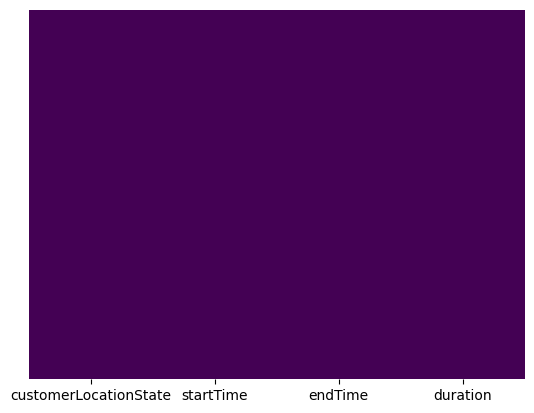

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Dataset has no missing values. If there were any, you would've noticed in figure represented by different colour shade on purple background.

In [ ]:
df.columns

Index(['customerLocationState', 'startTime', 'endTime', 'duration'], dtype='object')

# Data Preparation

In [ ]:
df.customerLocationState.unique()

array(['Bedroom', 'Hallway', 'Stairs', 'Kitchen', 'Bathroom',
       'Livingroom', 'Toilet', 'Conservatory', 'Out of Location',
       'Cloakroom'], dtype=object)

Merging "Hallway" and "Livingroom" as single bigger room

In [ ]:
df['customerLocationState']=df.customerLocationState.str.replace('Hallway','Bigroom' ).replace('Livingroom','Bigroom')
df.customerLocationState.unique()

array(['Bedroom', 'Bigroom', 'Stairs', 'Kitchen', 'Bathroom', 'Toilet',
       'Conservatory', 'Out of Location', 'Cloakroom'], dtype=object)

# Label Encoding customerLocation

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Location'] = le.fit_transform(df['customerLocationState'])
dfLocation = df[['customerLocationState','Location']]
dfLocation.head(2)

,customerLocationState,Location
0,Bedroom,1
1,Bigroom,2


# Labels Representation

In [ ]:
integer_mapping = {l: i for i, l in enumerate(le.classes_)}
integer_mapping

{'Bathroom': 0,
 'Bedroom': 1,
 'Bigroom': 2,
 'Cloakroom': 3,
 'Conservatory': 4,
 'Kitchen': 5,
 'Out of Location': 6,
 'Stairs': 7,
 'Toilet': 8}

count    12655.000000
mean        10.438925
std         46.361073
min          0.000000
25%          0.116667
50%          0.633333
75%          2.566667
max        532.916667
Name: durationMinutes, dtype: float64
we have a positive skewness :8.565354826247916


<Axes: xlabel='durationMinutes', ylabel='Density'>

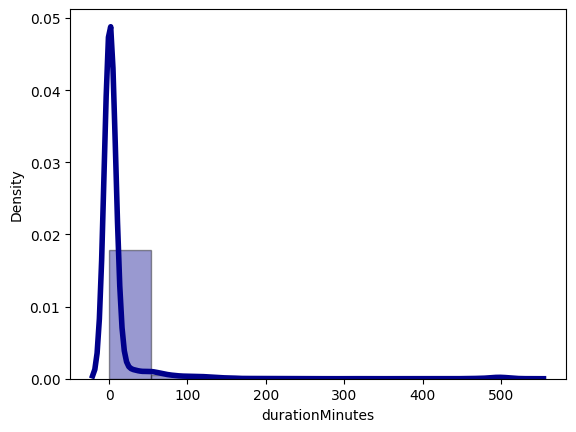

In [ ]:
df['durationMinutes'] = df['duration'].dt.total_seconds()/60
print(df.durationMinutes.describe())
print('we have a positive skewness :' + str(df.durationMinutes.skew()))
import seaborn as sns

sns.distplot(df['durationMinutes'], hist=True, kde=True,
             bins=10, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


# Extracting datetime features using datetime module

In [ ]:
import pandas as pd

df['DateStart'] = pd.to_datetime(df['startTime']).dt.date
df['YearStart'] = pd.to_datetime(df['startTime']).dt.year
df['MonthStart'] = pd.to_datetime(df['startTime']).dt.month
df['weekStart'] = pd.to_datetime(df['startTime']).dt.week
df['DayStart'] = pd.to_datetime(df['startTime']).dt.day
df['WeekYear'] = df['startTime'].apply(lambda x: "%d/%d" % (x.week, x.year))
df['MonthYear'] = df['startTime'].apply(lambda x: "%d/%d" % (x.month, x.year))

df['Dayofweekencoded'] = pd.to_datetime(df['startTime']).dt.dayofweek
df['Dayofweeknames'] = pd.to_datetime(df['startTime']).dt.day_name()
df['TimeStart'] = pd.to_datetime(df['startTime']).dt.time
df['hourStart'] = pd.to_datetime(df['startTime']).dt.hour
df.head(2)

,customerLocationState,startTime,endTime,duration,Location,durationMinutes,DateStart,YearStart,MonthStart,weekStart,DayStart,WeekYear,MonthYear,Dayofweekencoded,Dayofweeknames,TimeStart,hourStart
0,Bedroom,2021-08-31 23:39:33,2021-08-31 21:46:05,0 days 01:53:28,1,113.466667,2021-08-31,2021,8,35,31,35/2021,8/2021,1,Tuesday,23:39:33,23
1,Bigroom,2021-08-31 21:46:05,2021-08-31 21:40:46,0 days 00:05:19,2,5.316667,2021-08-31,2021,8,35,31,35/2021,8/2021,1,Tuesday,21:46:05,21


# Sorting data by Start time

In [ ]:
df = df.sort_values(by='startTime',ascending=True)

# Unique Values

In [ ]:
print('Hours:' ,df.hourStart.unique())
print("Days names:" , df.Dayofweeknames.unique())
print('DayStart' ,df.DayStart.unique())
print('Years' ,df.YearStart.unique())
print('Month and Year' ,df.MonthYear.unique())
print('num of week for each year:' , df.WeekYear.unique())
print('customerLocationState' , df.customerLocationState.unique())
print('Locations encoded' , df.Location.unique())

Hours: [ 5  6  7  8  9 10 11 12 14 16 17 18 19 20 21 15 13 22 23  0  3]
Days names: ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']
DayStart [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Years [2021]
Month and Year ['6/2021' '7/2021' '8/2021']
num of week for each year: ['22/2021' '23/2021' '24/2021' '25/2021' '26/2021' '27/2021' '28/2021'
 '29/2021' '30/2021' '31/2021' '32/2021' '33/2021' '34/2021' '35/2021']
customerLocationState ['Stairs' 'Bigroom' 'Kitchen' 'Bathroom' 'Toilet' 'Bedroom' 'Conservatory'
 'Cloakroom' 'Out of Location']
Locations encoded [7 2 5 0 8 1 4 3 6]


# Visualizing Time Series

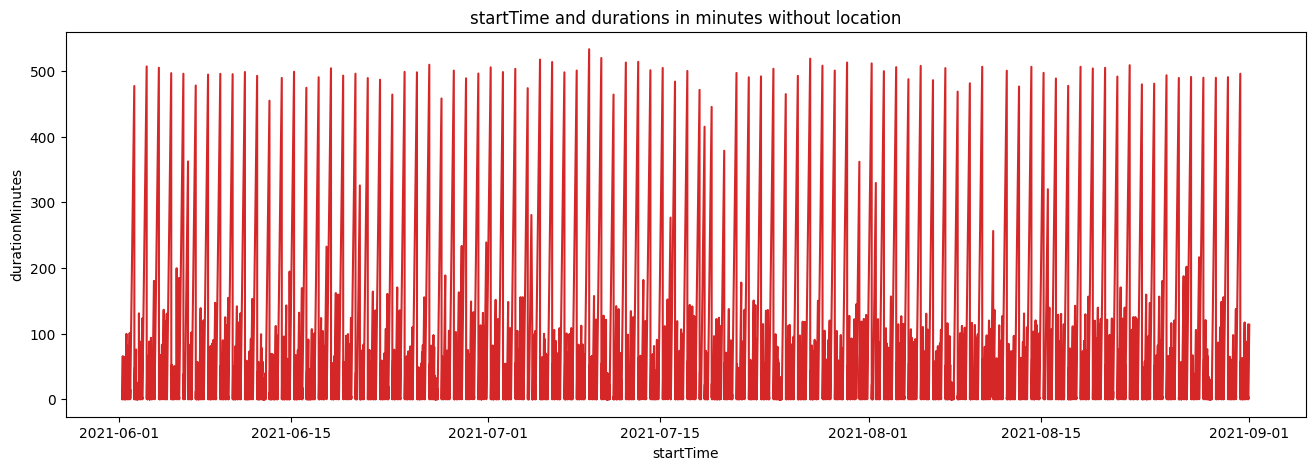

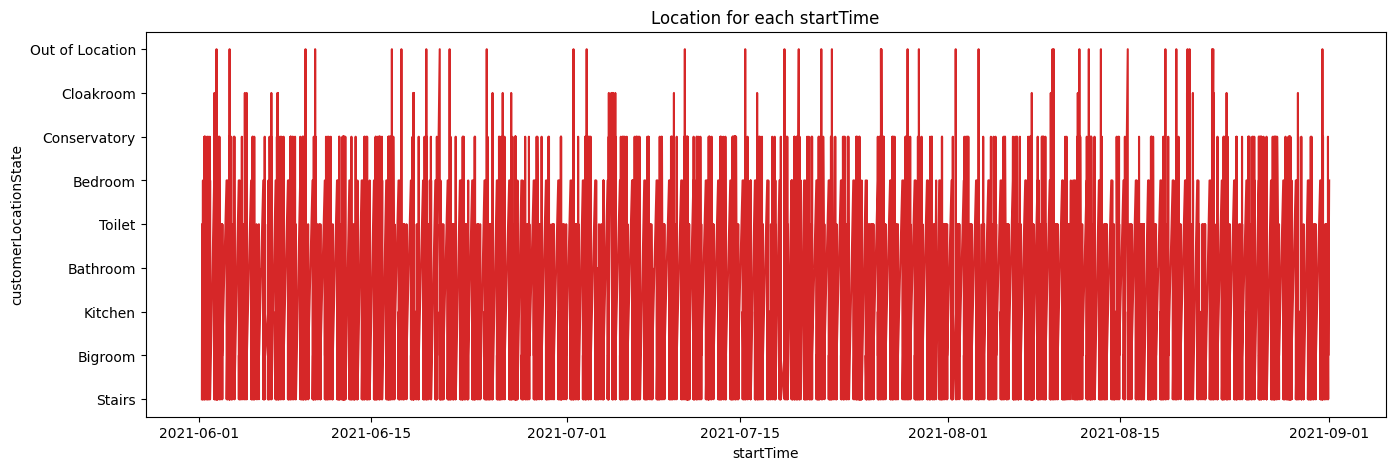

In [ ]:
import matplotlib.pyplot as plt

def plot_df(df, x, y, title="", xlabel='startTime', ylabel='durationMinutes', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.startTime, y=df.durationMinutes, title='startTime and durations in minutes without location')
plot_df(df, x=df.startTime, y=df.customerLocationState, title='Location for each startTime',xlabel='startTime', ylabel='customerLocationState',)


# Using plotly plot and zoom

In [ ]:

import plotly.express as px
import pandas as pd

import plotly.graph_objects as go

import pandas as pd

fig1 = go.Figure([go.Scatter(x=df['startTime'], y=df['durationMinutes'])])

fig2= go.Figure([go.Scatter(x=df['startTime'], y=df['customerLocationState'])])
fig1.show()
fig2.show()


# EDA

Let's look for the count by day , month

               count unique      top freq
Dayofweeknames                           
Friday          1645      9  Bigroom  554
Monday          1714      9  Bigroom  611
Saturday        2401      9  Bigroom  845
Sunday          1711      9  Bigroom  572
Thursday        1657      9  Bigroom  557
Tuesday         1814      8  Bigroom  638
Wednesday       1713      9  Bigroom  615


<Axes: xlabel='Dayofweeknames'>

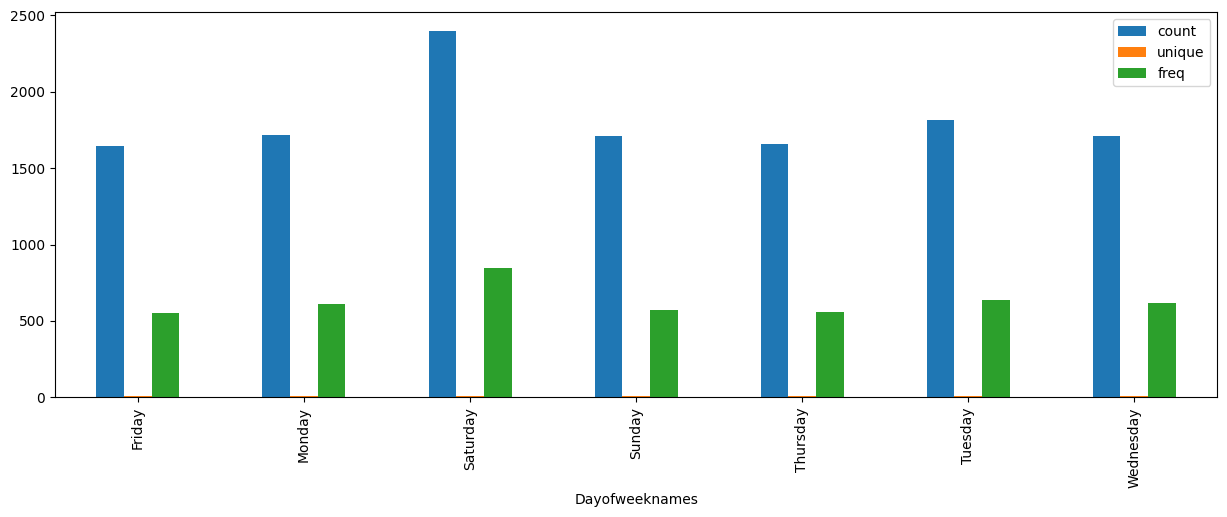

In [ ]:

groupbyday=df.groupby(['Dayofweeknames']).customerLocationState.describe()
print(groupbyday)
groupbyday.plot(kind='bar',figsize=(15, 5))

                                     count unique              top freq
Dayofweeknames customerLocationState                                   
Friday         Bathroom                 83      1         Bathroom   83
               Bedroom                  39      1          Bedroom   39
               Bigroom                 554      1          Bigroom  554
               Cloakroom                11      1        Cloakroom   11
               Conservatory             61      1     Conservatory   61
...                                    ...    ...              ...  ...
Wednesday      Conservatory             80      1     Conservatory   80
               Kitchen                 235      1          Kitchen  235
               Out of Location           7      1  Out of Location    7
               Stairs                  518      1           Stairs  518
               Toilet                  141      1           Toilet  141

[62 rows x 4 columns]


<Axes: xlabel='Dayofweeknames,customerLocationState'>

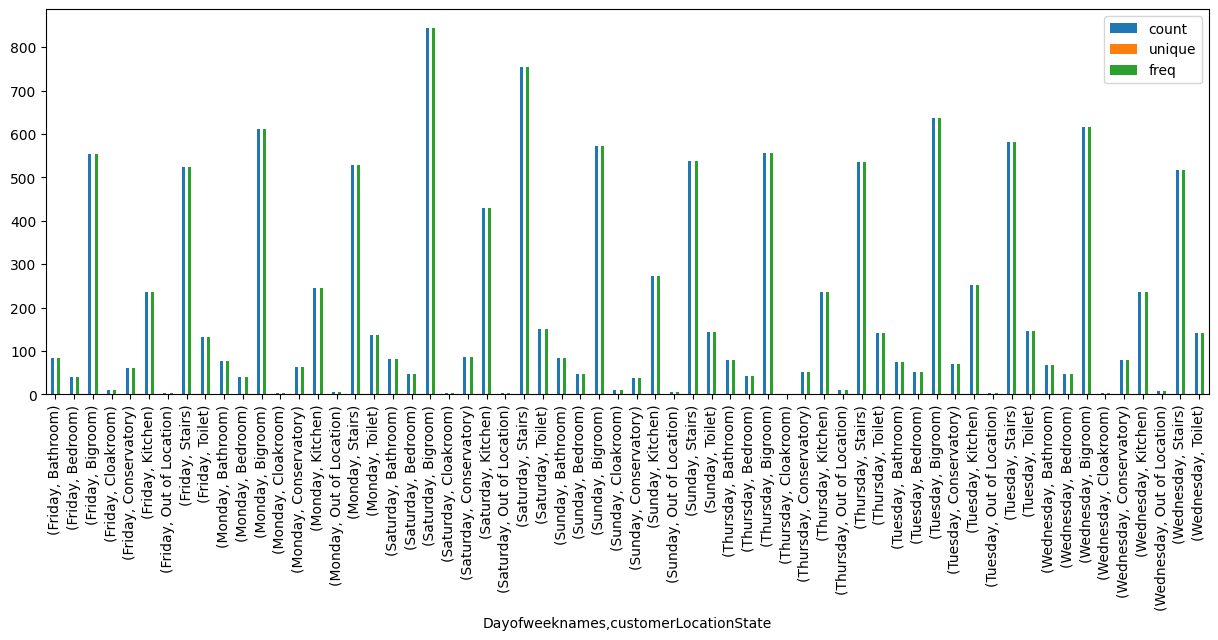

In [ ]:
groupbydayandlocation=df.groupby(['Dayofweeknames','customerLocationState']).customerLocationState.describe()
print(groupbydayandlocation)
groupbydayandlocation.plot(kind='bar',figsize=(15, 5))

# Most Frequent Location

In [ ]:
import seaborn as sns
red= sns.light_palette("red", as_cmap=True)
pd.crosstab(index=df["customerLocationState"],
                      columns="count").style.background_gradient(cmap=red)

col_0,count
customerLocationState,
Bathroom,548
Bedroom,317
Bigroom,4392
Cloakroom,31
Conservatory,450
Kitchen,1908
Out of Location,37
Stairs,3978
Toilet,994


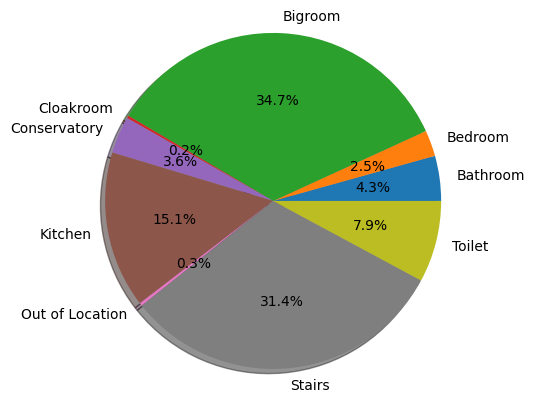

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
labels = df['customerLocationState'].astype('category').cat.categories.tolist()
counts = df['customerLocationState'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

                                      count        mean         std       min  \
Dayofweeknames customerLocationState                                            
Friday         Bathroom                83.0    2.991165    3.690352  0.000000   
               Bedroom                 39.0  176.801709  230.878928  0.000000   
               Bigroom                554.0   15.965373   33.683113  0.000000   
               Cloakroom               11.0    0.737879    0.616040  0.000000   
               Conservatory            61.0    3.593716    6.814218  0.000000   
...                                     ...         ...         ...       ...   
Wednesday      Conservatory            80.0    3.167500    3.236264  0.033333   
               Kitchen                235.0    9.388211   15.892223  0.000000   
               Out of Location          7.0    5.091714    4.405741  0.107117   
               Stairs                 518.0    0.481812    0.919718  0.000000   
               Toilet       

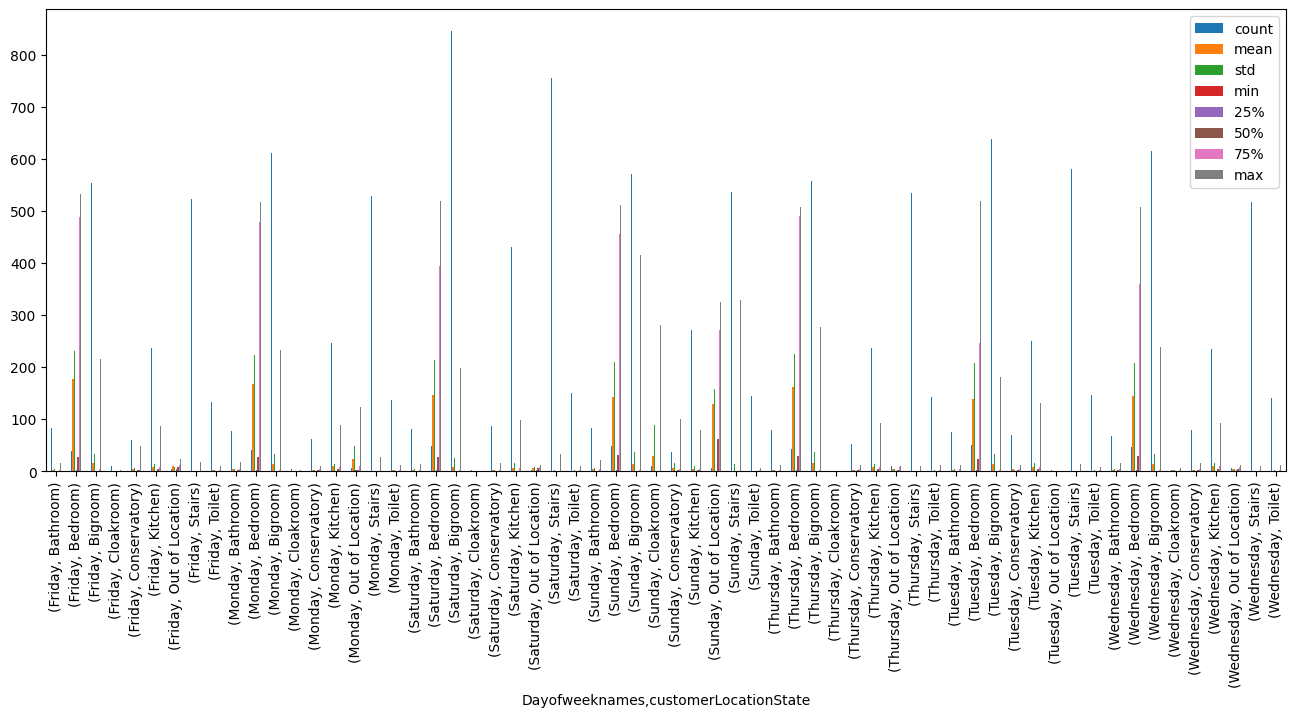

In [ ]:
groupbyduration=df.groupby(['Dayofweeknames','customerLocationState'])['durationMinutes'].describe()
print(groupbyduration)
print(groupbyduration.plot.bar(figsize=(16, 6)))

                                     sum                                      \
hourStart                             0         3            5            6    
Dayofweeknames customerLocationState                                           
Friday         Bathroom              NaN       NaN     1.283333     2.733333   
               Bedroom               NaN       NaN  3942.966667  2537.750000   
               Bigroom               NaN       NaN    12.066667   191.766667   
               Cloakroom             NaN       NaN          NaN          NaN   
               Conservatory          NaN       NaN          NaN     2.983333   
...                                   ..       ...          ...          ...   
Wednesday      Conservatory          NaN       NaN          NaN     0.883333   
               Kitchen               NaN  0.833333          NaN   105.116667   
               Out of Location       NaN       NaN          NaN          NaN   
               Stairs                NaN

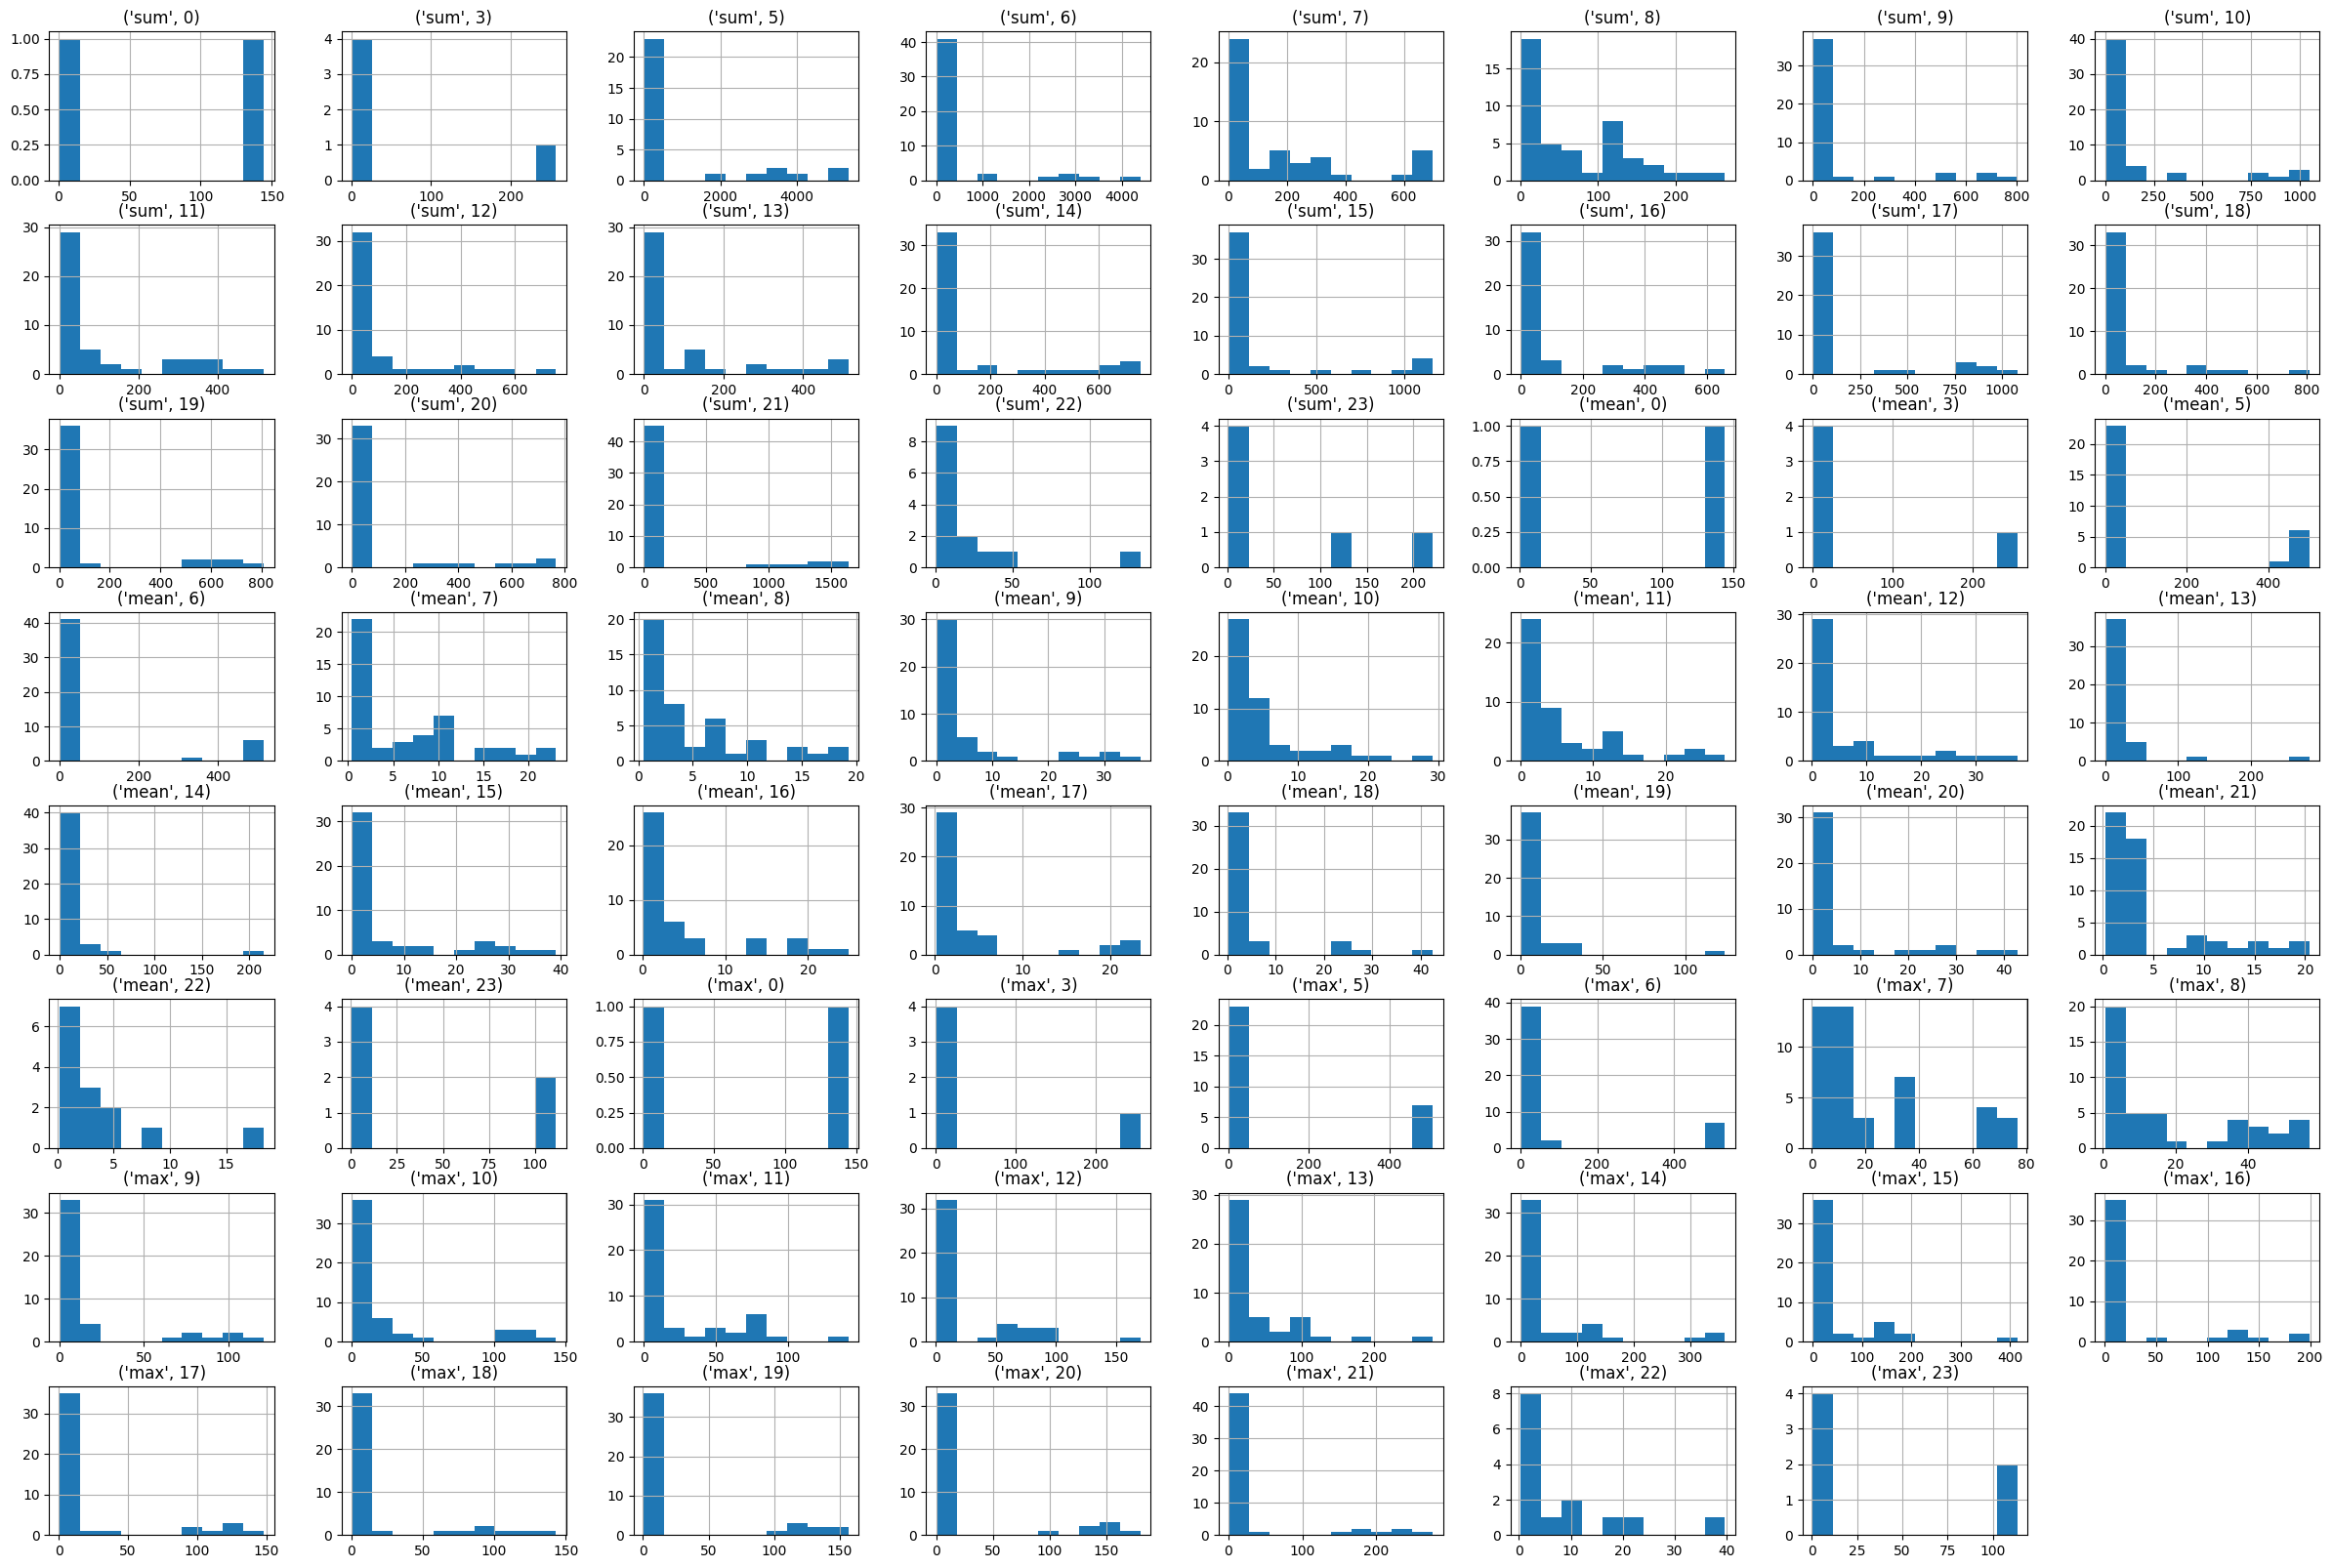

In [ ]:

DayHourLocationDuration=df.groupby(['Dayofweeknames', 'customerLocationState','hourStart'])['durationMinutes'].agg(['sum', 'mean', 'max']).unstack()
print(DayHourLocationDuration)
print(DayHourLocationDuration.hist(figsize=(30, 20)))
plt.show()

# Data Transformation

data decomposition

In [ ]:
df['total_freqbyday'] = df.groupby(['DateStart','customerLocationState'])['customerLocationState'].transform('count')
df['freq_cumbyday'] = df.groupby(['DateStart','customerLocationState'])['customerLocationState'].cumcount()+1
df['freq_cumbyHourofDay'] = df.groupby(['DateStart','customerLocationState','hourStart'])['customerLocationState'].cumcount()+1
df['freq_totalbyHourofDay'] = df.groupby(['DateStart','customerLocationState','hourStart'])['customerLocationState'].transform('count')
df['duration_cumusumbyday'] = df.groupby(['DateStart','customerLocationState'])['durationMinutes'].apply(lambda x: x.cumsum())
df['duration_totalsumbyday'] = df.groupby(['DateStart','customerLocationState'])['durationMinutes'].transform('sum')
dfsort= df.sort_values(by=['DateStart','customerLocationState'],ascending=True)
dfsort[['startTime','hourStart','customerLocationState','freq_cumbyHourofDay','freq_totalbyHourofDay','freq_cumbyday','total_freqbyday','durationMinutes','duration_cumusumbyday','duration_totalsumbyday']].head(10)

,startTime,hourStart,customerLocationState,freq_cumbyHourofDay,freq_totalbyHourofDay,freq_cumbyday,total_freqbyday,durationMinutes,duration_cumusumbyday,duration_totalsumbyday
12648,2021-06-01 06:14:09,6,Bathroom,1,1,1,6,0.833333,0.833333,15.350000
12640,2021-06-01 07:24:39,7,Bathroom,1,2,2,6,0.883333,1.716667,15.350000
12633,2021-06-01 07:36:01,7,Bathroom,2,2,3,6,9.350000,11.066667,15.350000
12623,2021-06-01 08:04:15,8,Bathroom,1,1,4,6,0.616667,11.683333,15.350000
12600,2021-06-01 11:08:51,11,Bathroom,1,1,5,6,0.833333,12.516667,15.350000
12506,2021-06-01 21:38:03,21,Bathroom,1,1,6,6,2.833333,15.350000,15.350000
12630,2021-06-01 07:58:39,7,Bedroom,1,2,1,3,21.233333,21.233333,37.100000
12628,2021-06-01 07:59:45,7,Bedroom,2,2,2,3,0.916667,22.150000,37.100000
12503,2021-06-01 21:55:42,21,Bedroom,1,1,3,3,14.950000,37.100000,37.100000
12653,2021-06-01 06:05:45,6,Bigroom,1,4,1,55,10.466667,10.466667,716.633333


### Data analysis after feautres extracing and  decomposition
### Two-Way Tables

In [ ]:
import seaborn as sns
df['hourstrinng']=df['hourStart'].apply(str)
orange = sns.light_palette("orange", as_cmap=True)
freqhourofday=pd.crosstab(index=df['customerLocationState'],columns=df['hourstrinng']
                          ,margins=True)
# Include row and column totals
freqhourofday.columns = ['1' ,'2' ,'3' ,'4', '5', '6', '7' ,'8' ,'9','10', '11', '12', '13', '14', '15', '16' ,'17', '18','19', '20','21',"RowLocationFrequency"]
freqhourofday.index= ['Bathroom','Bedroom','Bigroom','Cloakroom','Conservatory','Kitchen','Out of Location','Stairs', 'Toilet','ColHourLocationFrequency']
freqhourofday

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,RowLocationFrequency
Bathroom,0,29,19,13,7,10,25,20,44,17,...,111,6,0,0,4,24,142,39,11,548
Bedroom,1,3,4,0,1,4,7,0,0,0,...,12,7,3,1,55,38,110,68,0,317
Bigroom,0,349,358,178,118,171,269,188,351,220,...,598,33,2,5,58,287,428,207,138,4392
Cloakroom,0,5,4,1,1,1,5,1,2,1,...,5,0,0,0,0,1,1,1,2,31
Conservatory,0,45,75,33,31,37,32,22,39,30,...,29,1,0,0,0,7,2,14,15,450
Kitchen,0,176,150,115,96,87,124,92,153,129,...,189,6,1,1,5,124,86,152,69,1908
Out of Location,0,6,6,4,6,5,4,2,1,0,...,0,0,0,0,0,0,0,0,2,37
Stairs,1,333,290,177,125,133,236,168,283,192,...,481,29,5,4,83,264,463,331,134,3978
Toilet,0,89,35,19,16,21,73,56,110,38,...,159,6,0,2,7,74,135,23,18,994
ColHourLocationFrequency,2,1035,941,540,401,469,775,549,983,627,...,1584,88,11,13,212,819,1367,835,389,12655


# To get the total proportion of frequency in each cell, divide the table by the grand total

In [ ]:
freqhourofday/freqhourofday.loc["ColHourLocationFrequency","RowLocationFrequency"]

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,RowLocationFrequency
Bathroom,0.000000,0.002292,0.001501,0.001027,0.000553,0.000790,0.001976,0.001580,0.003477,0.001343,...,0.008771,0.000474,0.000000,0.000000,0.000316,0.001896,0.011221,0.003082,0.000869,0.043303
Bedroom,0.000079,0.000237,0.000316,0.000000,0.000079,0.000316,0.000553,0.000000,0.000000,0.000000,...,0.000948,0.000553,0.000237,0.000079,0.004346,0.003003,0.008692,0.005373,0.000000,0.025049
Bigroom,0.000000,0.027578,0.028289,0.014066,0.009324,0.013512,0.021256,0.014856,0.027736,0.017384,...,0.047254,0.002608,0.000158,0.000395,0.004583,0.022679,0.033821,0.016357,0.010905,0.347056
Cloakroom,0.000000,0.000395,0.000316,0.000079,0.000079,0.000079,0.000395,0.000079,0.000158,0.000079,...,0.000395,0.000000,0.000000,0.000000,0.000000,0.000079,0.000079,0.000079,0.000158,0.002450
Conservatory,0.000000,0.003556,0.005927,0.002608,0.002450,0.002924,0.002529,0.001738,0.003082,0.002371,...,0.002292,0.000079,0.000000,0.000000,0.000000,0.000553,0.000158,0.001106,0.001185,0.035559
Kitchen,0.000000,0.013908,0.011853,0.009087,0.007586,0.006875,0.009798,0.007270,0.012090,0.010194,...,0.014935,0.000474,0.000079,0.000079,0.000395,0.009798,0.006796,0.012011,0.005452,0.150770
Out of Location,0.000000,0.000474,0.000474,0.000316,0.000474,0.000395,0.000316,0.000158,0.000079,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000158,0.002924
Stairs,0.000079,0.026314,0.022916,0.013987,0.009878,0.010510,0.018649,0.013275,0.022363,0.015172,...,0.038009,0.002292,0.000395,0.000316,0.006559,0.020861,0.036586,0.026156,0.010589,0.314342
Toilet,0.000000,0.007033,0.002766,0.001501,0.001264,0.001659,0.005768,0.004425,0.008692,0.003003,...,0.012564,0.000474,0.000000,0.000158,0.000553,0.005847,0.010668,0.001817,0.001422,0.078546
ColHourLocationFrequency,0.000158,0.081786,0.074358,0.042671,0.031687,0.037060,0.061241,0.043382,0.077677,0.049546,...,0.125168,0.006954,0.000869,0.001027,0.016752,0.064718,0.108021,0.065982,0.030739,1.000000


# To get the proportion of counts along each column divide by the column totals

In [ ]:
freqhourofday/freqhourofday.loc["ColHourLocationFrequency"]

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,RowLocationFrequency
Bathroom,0.0,0.028019,0.020191,0.024074,0.017456,0.021322,0.032258,0.036430,0.044761,0.027113,...,0.070076,0.068182,0.000000,0.000000,0.018868,0.029304,0.103877,0.046707,0.028278,0.043303
Bedroom,0.5,0.002899,0.004251,0.000000,0.002494,0.008529,0.009032,0.000000,0.000000,0.000000,...,0.007576,0.079545,0.272727,0.076923,0.259434,0.046398,0.080468,0.081437,0.000000,0.025049
Bigroom,0.0,0.337198,0.380446,0.329630,0.294264,0.364606,0.347097,0.342441,0.357070,0.350877,...,0.377525,0.375000,0.181818,0.384615,0.273585,0.350427,0.313094,0.247904,0.354756,0.347056
Cloakroom,0.0,0.004831,0.004251,0.001852,0.002494,0.002132,0.006452,0.001821,0.002035,0.001595,...,0.003157,0.000000,0.000000,0.000000,0.000000,0.001221,0.000732,0.001198,0.005141,0.002450
Conservatory,0.0,0.043478,0.079702,0.061111,0.077307,0.078891,0.041290,0.040073,0.039674,0.047847,...,0.018308,0.011364,0.000000,0.000000,0.000000,0.008547,0.001463,0.016766,0.038560,0.035559
Kitchen,0.0,0.170048,0.159405,0.212963,0.239401,0.185501,0.160000,0.167577,0.155646,0.205742,...,0.119318,0.068182,0.090909,0.076923,0.023585,0.151404,0.062911,0.182036,0.177378,0.150770
Out of Location,0.0,0.005797,0.006376,0.007407,0.014963,0.010661,0.005161,0.003643,0.001017,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005141,0.002924
Stairs,0.5,0.321739,0.308183,0.327778,0.311721,0.283582,0.304516,0.306011,0.287894,0.306220,...,0.303662,0.329545,0.454545,0.307692,0.391509,0.322344,0.338698,0.396407,0.344473,0.314342
Toilet,0.0,0.085990,0.037194,0.035185,0.039900,0.044776,0.094194,0.102004,0.111902,0.060606,...,0.100379,0.068182,0.000000,0.153846,0.033019,0.090354,0.098756,0.027545,0.046272,0.078546
ColHourLocationFrequency,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
freqhourofday.div(freqhourofday["RowLocationFrequency"],
                   axis=0)

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,RowLocationFrequency
Bathroom,0.000000,0.052920,0.034672,0.023723,0.012774,0.018248,0.045620,0.036496,0.080292,0.031022,...,0.202555,0.010949,0.000000,0.000000,0.007299,0.043796,0.259124,0.071168,0.020073,1.0
Bedroom,0.003155,0.009464,0.012618,0.000000,0.003155,0.012618,0.022082,0.000000,0.000000,0.000000,...,0.037855,0.022082,0.009464,0.003155,0.173502,0.119874,0.347003,0.214511,0.000000,1.0
Bigroom,0.000000,0.079463,0.081512,0.040528,0.026867,0.038934,0.061248,0.042805,0.079918,0.050091,...,0.136157,0.007514,0.000455,0.001138,0.013206,0.065346,0.097450,0.047131,0.031421,1.0
Cloakroom,0.000000,0.161290,0.129032,0.032258,0.032258,0.032258,0.161290,0.032258,0.064516,0.032258,...,0.161290,0.000000,0.000000,0.000000,0.000000,0.032258,0.032258,0.032258,0.064516,1.0
Conservatory,0.000000,0.100000,0.166667,0.073333,0.068889,0.082222,0.071111,0.048889,0.086667,0.066667,...,0.064444,0.002222,0.000000,0.000000,0.000000,0.015556,0.004444,0.031111,0.033333,1.0
Kitchen,0.000000,0.092243,0.078616,0.060273,0.050314,0.045597,0.064990,0.048218,0.080189,0.067610,...,0.099057,0.003145,0.000524,0.000524,0.002621,0.064990,0.045073,0.079665,0.036164,1.0
Out of Location,0.000000,0.162162,0.162162,0.108108,0.162162,0.135135,0.108108,0.054054,0.027027,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054054,1.0
Stairs,0.000251,0.083710,0.072901,0.044495,0.031423,0.033434,0.059326,0.042232,0.071141,0.048265,...,0.120915,0.007290,0.001257,0.001006,0.020865,0.066365,0.116390,0.083208,0.033685,1.0
Toilet,0.000000,0.089537,0.035211,0.019115,0.016097,0.021127,0.073441,0.056338,0.110664,0.038229,...,0.159960,0.006036,0.000000,0.002012,0.007042,0.074447,0.135815,0.023139,0.018109,1.0
ColHourLocationFrequency,0.000158,0.081786,0.074358,0.042671,0.031687,0.037060,0.061241,0.043382,0.077677,0.049546,...,0.125168,0.006954,0.000869,0.001027,0.016752,0.064718,0.108021,0.065982,0.030739,1.0


# Highest values

In [ ]:
red = sns.light_palette("red", as_cmap=True)
Location_Hour_cumfrequecy = pd.crosstab(index=df["customerLocationState"],
                             columns=[df["hourstrinng"],
                                      df["freq_totalbyHourofDay"]],
                             margins=True)  # Include row and column totals

Location_Hour_cumfrequecy.style.background_gradient(cmap=red)

# This table is so important to have an idea of the frequency of location in each hour so let's create another feautres event that describe the changement of location and look for the frequency of event for each hour and for each day

In [ ]:
import numpy as np

df['event']= np.where((df['customerLocationState']!=df['customerLocationState'].shift())
                      ,df['customerLocationState'].shift()+' to '+df['customerLocationState'],'nochange')
df[['customerLocationState','event']].head(3)

,customerLocationState,event
12654,Stairs,NaN
12653,Bigroom,Stairs to Bigroom
12652,Bigroom,nochange


In [ ]:
la=LabelEncoder()
df=df.dropna()
df=df.drop_duplicates()
df['eventcoded'] = la.fit_transform(df['event'])
integer_mapping = {l: i for i, l in enumerate(la.classes_)}
integer_mapping

{'Bathroom to Bigroom': 0,
 'Bathroom to Conservatory': 1,
 'Bathroom to Kitchen': 2,
 'Bathroom to Out of Location': 3,
 'Bathroom to Stairs': 4,
 'Bathroom to Toilet': 5,
 'Bedroom to Bigroom': 6,
 'Bedroom to Cloakroom': 7,
 'Bedroom to Kitchen': 8,
 'Bedroom to Stairs': 9,
 'Bedroom to Toilet': 10,
 'Bigroom to Bathroom': 11,
 'Bigroom to Bedroom': 12,
 'Bigroom to Cloakroom': 13,
 'Bigroom to Conservatory': 14,
 'Bigroom to Kitchen': 15,
 'Bigroom to Out of Location': 16,
 'Bigroom to Stairs': 17,
 'Bigroom to Toilet': 18,
 'Cloakroom to Bathroom': 19,
 'Cloakroom to Bedroom': 20,
 'Cloakroom to Bigroom': 21,
 'Cloakroom to Conservatory': 22,
 'Cloakroom to Kitchen': 23,
 'Cloakroom to Stairs': 24,
 'Conservatory to Bigroom': 25,
 'Conservatory to Kitchen': 26,
 'Conservatory to Stairs': 27,
 'Conservatory to Toilet': 28,
 'Kitchen to Bathroom': 29,
 'Kitchen to Bedroom': 30,
 'Kitchen to Bigroom': 31,
 'Kitchen to Cloakroom': 32,
 'Kitchen to Conservatory': 33,
 'Kitchen to Out o

In [ ]:
import seaborn as sns
red= sns.light_palette("red", as_cmap=True)
pd.crosstab(index=df["event"],
                      columns="count").style.background_gradient(cmap=red)

col_0,count
event,
Bathroom to Bigroom,124
Bathroom to Conservatory,1
Bathroom to Kitchen,22
Bathroom to Out of Location,1
Bathroom to Stairs,382
Bathroom to Toilet,18
Bedroom to Bigroom,6
Bedroom to Cloakroom,1
Bedroom to Kitchen,2


In [ ]:
pd.crosstab(index=df["customerLocationState"],
                             columns=[df["Dayofweeknames"],
                                      df["event"]],
                             margins=True).style.background_gradient(cmap=red)

# Performing Chi_Square Test

The H0 (Null Hypothesis): There is no relationship between variable one and variable two.

The H1 (Alternative Hypothesis): There is a relationship between variable 1 and variable 2.

If the p-value is significant, I can reject the null hypothesis and claim that the findings support the alternative hypothesis.

let's propose a=0.05

If p-value < a, reject H0

If p-value >a, fail to reject H0

In [ ]:
import pandas
from scipy.stats import chi2_contingency
c, p, dof, expected =chi2_contingency(pd.crosstab(index=df['customerLocationState'],columns=df['hourstrinng']))
print('chi square test statistic:'+ str(c))
print('p-value:'+ str(p))
print('Degree of Freedom:' + str(dof))
print(f"Chi2 result of the contingency table: {c}, p-value: {p}")

chi square test statistic:1902.338383530377
p-value:1.9090055989471423e-295
Degree of Freedom:160
Chi2 result of the contingency table: 1902.338383530377, p-value: 1.9090055989471423e-295


Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. I can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between Location and hour start in a location

In [ ]:
import pandas
from scipy.stats import chi2_contingency
c1, p1, dof1, expected1 =chi2_contingency(pd.crosstab(index=df['customerLocationState'],columns=df['Dayofweeknames']))
print('chi square test statistic:'+ str(c1))
print('p-value:'+ str(p1))
print('Degree of Freedom:' + str(dof1))

chi square test statistic:106.69198307455211
p-value:2.3893559488207603e-06
Degree of Freedom:48


In [ ]:
import pandas
from scipy.stats import chi2_contingency
c11, p11, dof11, expected11 =chi2_contingency(pd.crosstab(index=df['customerLocationState'],columns=df['Dayofweeknames']))
print('chi square test statistic:'+ str(c11))
print('p-value:'+ str(p11))
print('Degree of Freedom:' + str(dof11))

chi square test statistic:106.69198307455211
p-value:2.3893559488207603e-06
Degree of Freedom:48


In [ ]:
import pandas
from scipy.stats import chi2_contingency
c11, p11, dof11, expected11 =chi2_contingency(pd.crosstab(index=df['customerLocationState'],columns=df['customerLocationState'].shift()))
print('chi square test statistic:'+ str(c11))
print('p-value:'+ str(p11))
print('Degree of Freedom:' + str(dof11))

chi square test statistic:8517.947057701213
p-value:0.0
Degree of Freedom:64


In [ ]:
import pandas
from scipy.stats import chi2_contingency
c11, p11, dof11, expected11 =chi2_contingency(pd.crosstab(index=df['customerLocationState'],columns=df['duration_cumusumbyday']))
print('chi square test statistic:'+ str(c11))
print('p-value:'+ str(p11))
print('Degree of Freedom:' + str(dof11))

chi square test statistic:73556.30180448914
p-value:7.565389356593755e-07
Degree of Freedom:71720


# Result of EDA:


-Correllation between hour start and frequency of location

-The person has routine behaviour and spends most of their time in the living room, bedroom, and kitchen.

-A very few times a person goes outside

-The anomalous behaviour can be detected based on frequency of location, hour of start, change of event, and duration in a specific room.

-The analogy is that if the person is present in a particular location for a long time, where he or she usually is not present for a long time, the person may be facing some health issue or may be unconscious as the person is 80+ years old. Using this anomaly detection, we can message the person's relatives or ambulance.

-I will try detecting the anomaly using unsupervised learning and LSTM; classification is not possible as the data is not labelled. If we had known of any anomaly's incident timestamp, I would have used classification too.